#Regla de Simpson 3/8
De manera similar a la obtención de la regla del trapecio y Simpson 1/3, es posible ajustar un polinomio de Lagrange de tercer grado a cuatro puntos e integrarlo:
\begin{equation}
I=\int_a^bf(x)dx\cong\int_a^bf_3(x)dx
\end{equation}
Al igual que los otros casos, haciendo la integral y haciendo las transformaciones necesarias, el resultado es
\begin{equation}
I\cong(b-a)\frac{f(x_0)+3f(x_1)+3f(x_2)+f(x_3)}{8}
\end{equation}
Al igual que los otros se pueden hacer las integrales por intervalos y llegar a un expresión similar a la regla de Simpson 1/3.

In [1]:
#Código hecho por: Diana Ailed Hernández Bustos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad


# Integral Simpson 3/8 ==> se requieren # subintervalos múltiplos de 3, por lo que serán puntos como (4,7,10 en adelante)

In [2]:
def func(x):
    return 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

def sim38(x, n, h):
    suma1 = 0
    suma2 = 0
    fx0=func(a)
    fxn=func(b)
    #Cálculos
    for i in range(1, n-1, 3):
        suma1 = (func(x[i]) + func(x[i+1])) + suma1
    suma1 = 3*suma1

    for i in range(3, n-2, 3):
        suma2 = (func(x[i])) + suma2
    suma2 = 2*suma2
    integral = (suma1 + suma2 + fx0 + fxn)*(3*h/8)

    return integral

def grafica(x, a, b, d):
    #Gráfica:
    k = 100
    x1 = np.linspace(a, b, k)
    fx = np.zeros([k])
    y = np.zeros([d])

    for i in range (k):
        fx[i] = func(x1[i])

    for i in range (d):
        y[i] = func(x[i])

    plt.title('Integración')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.plot(x1, fx ,color="blue",linewidth=2, label= "Función")
    plt.scatter(x, y, color='black', label = 'Intérvalos')
    plt.legend()
    plt.show()
    return y

In [3]:
n = 18         # Intervalos
a = 0
b = 0.8
h = (b-a)/n

p = n+1       # No de puntos = intervalos + 1
x = np.linspace(a,b,p)
d = len(x)

#Integral analítica:
integral, err = integrate.quad(func, a, b)
A = integral # Valor analítico

#Cálculos:
I = sim38 (x, n, h)
et = np.abs((A-I)/A)*100
print("REGLA SIMPSON 3/8:")
print("Valor obtenido: %.8f" %I)
print("Valor analítico: %.8f" %A)
print("Error porcentual : %.8f" %et)

REGLA SIMPSON 3/8:
Valor obtenido: 1.64043969
Valor analítico: 1.64053333
Error porcentual : 0.00570816


# Si no se proporcionan intervalos ==> se acomodan de forma que den múltiplos de 3

0.0001
  #Intervalos         h       Valor analítico  Int. Simpson 3/8        Error %       
       3           0.26667      1.640533333       1.51917037         7.39777E+00     
       6           0.13333      1.640533333      1.632948148         4.62361E-01     
       9          0.088889      1.640533333      1.639035025         9.13306E-02     
      12          0.066667      1.640533333      1.640059259         2.88976E-02     
      15          0.053333      1.640533333      1.640339153         1.18364E-02     
      18          0.044444      1.640533333      1.640439689         5.70816E-03     
      21          0.038095      1.640533333      1.640482786         3.08112E-03     
      24          0.033333      1.640533333      1.640503704         1.80610E-03     
      27           0.02963      1.640533333      1.640514836         1.12754E-03     
      30          0.026667      1.640533333      1.640521197         7.39777E-04     
      33          0.024242      1.640533333    

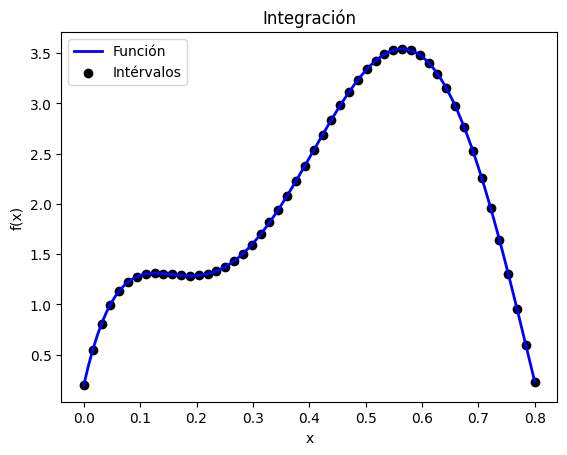

In [4]:
a = 0
b = 0.8
es = 1E-4
print(es)

#Integral analítica:
integral, err = integrate.quad(func, a, b)
A = integral # Valor analítico

#Cálculos:
print('{:^15}{:^15}{:^15}{:^20}{:^20}'.format('#Intervalos', 'h','Valor analítico' ,'Int. Simpson 3/8', 'Error %'))
for i in range(3,100,3): #Así te aseguras que va de 3 en 3
    n= i
    h = (b-a)/n
    p = n+1       # No de puntos = intervalos + 1
    x = np.linspace(a,b,p)
    d = len(x)
    #Simpson:
    I = sim38 (x, n, h)
    et = np.abs((A-I)/A)*100
    print('{:^15}{:^15.5}{:^15.10}{:^20.10}{:^20.5E}'.format(n, h, A, I, et))

    if et < es:
        break
#Gráfica:
j = grafica(x, a, b, d)